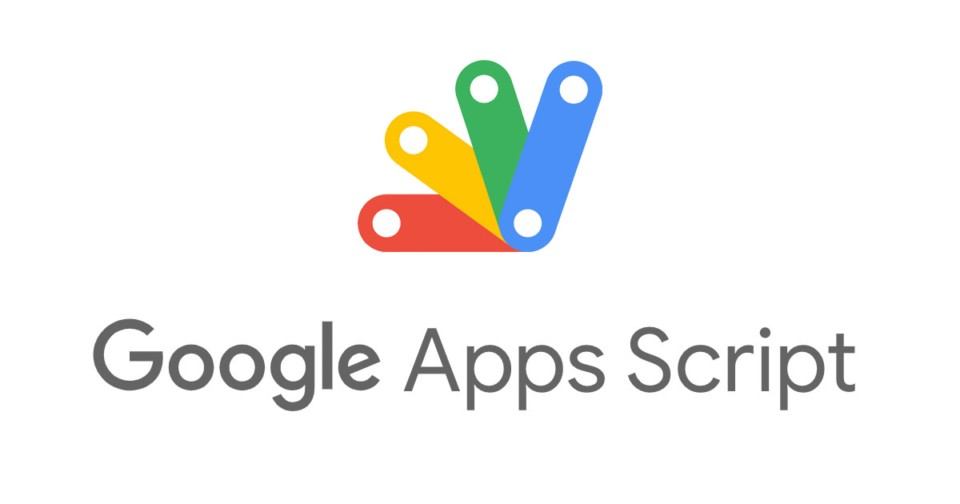

# Google Apps Script
## 구글 드라이브 폴더 내 파일 리스트 추출


### 1. 파일 리스트를 만들고 싶은 폴더에 새로운 스프레드시트를 만든다.

![폴더스크린샷](./Images/AppsScript_1.png)

### 2. 도구 > 스크립트 편집기 메뉴를 클릭한다.
![스크립트편집기메뉴스크린샷](./Images/AppsScript_2.png)

### 3. 스크립트 편집 화면에 아래 코드를 넣고 실행 > 함수 실행 > get_filelist 를 클릭한다.

In [ ]:
function get_filelist() {
   
  var thisFile = DriveApp.getFileById(SpreadsheetApp.getActive().getId());
  var folders = thisFile.getParents()
  var folderId;
  while (folders.hasNext()) {
    var folder = folders.next();
    folderId = folder.getId();
    break;
  }
   
  // get This Folder ID
  var daforder = DriveApp.getFolderById(folderId);
  var dafiles = daforder.getFiles();
 
  var sheet = SpreadsheetApp.getActiveSheet();
  sheet.clear();
 
  var srow = 1;
  // Write Header
  sheet.getRange(srow, 1).setValue("file name");
  sheet.getRange(srow, 2).setValue("만들어진 날짜");
  sheet.getRange(srow, 3).setValue("마지막으로 수정한 날짜");
  sheet.getRange(srow, 4).setValue("소유자");
  sheet.getRange(srow, 5).setValue("file type");
  sheet.getRange(srow, 6).setValue("Link");
  // Set Header color
  var range = sheet.getRange("A1:F1");
  range.setBackground("#f3f3f3");
   
  // Get file names
  while(dafiles.hasNext()){
    var dafile = dafiles.next();
    var file_name = dafile.getName();
     
    srow = srow + 1;
    // Write file info
    sheet.getRange(srow, 1).setValue(file_name);
    sheet.getRange(srow, 2).setValue(dafile.getDateCreated());
    sheet.getRange(srow, 3).setValue(dafile.getLastUpdated());
    sheet.getRange(srow, 4).setValue(dafile.getOwner().getName());
    sheet.getRange(srow, 5).setValue(dafile.getMimeType().replace('application/vnd.google-apps.', 'google '));
    sheet.getRange(srow, 6).setValue(dafile.getUrl());
     
  }
   
  range = sheet.getRange("F:F");
  range.setWrapStrategy(SpreadsheetApp.WrapStrategy.CLIP);
   
}